# Step-2 Details Instructions:
1.	List of variables selected for model built.
    * Unemployment rate
    * 10-year Treasury yield
    * Prime rate', 
    * 'House Price Index (Level)'
    * Unemployment rate_lag_1', 
    * 'Unemployment rate_lag_2
    * Log of (Dow Jones Total Stock Market Index (Level)),  
    * House Price Index (Level)_YOY
    * Mortgage rate.





2.	Correlation and Autocorrelation Requirements:

    *	For these nine variables create a correlation matrix and heatmap (table and graph). Multicollinearity for each variable, based on VIF values. 

    * Create a summary statistic, with number of observations, Mean, Std. Dev, Sum, Minimum and Maximum.

    * Autocorrelation and White Noise Test: Perform Augmented Dickey-Fuller Unit Root Test (Rho, Tau, F values) to highlight autocorrelation. You can also visually inspect the autocorrelation function plot or perform statistical tests such as the Ljung-Box test or the Durbin-Watson test to check for significant autocorrelation.

    * Exclude variables with negative results (you can send the results to me at this time if required to further narrow the list down).



3.	For the remaining variables built models,

    * I would recommend using the following (which I follow in SAS): GLIMMIX procedure in SAS, random effects (random residuals), binomial distribution, link equals logit.

    * You can try other alternatives (as part of step C), but please add comments on relevant code so that I can understand the applied methods.

    * model fit statistics should include AIC, BIC statistics and others ( I am assuming there is a command in Python which will generate all relevant one as there is in SAS). In-Sample Actual Default rate vs. Predicted default rate (curves).

    * Perform seven to eight iterations using different combinations, such as Unemployment rate, 10-year Treasury yield.

    * The results of each of these eight iterations, including the above-mentioned statistics and in-sample plots, should be added in the deliverable report.



4.	Final variables (3 variables tops) should be based on variable signs, statistical significance, In-Sample RMSE, and other model fit statistics (BIC and AIC) of the eight iterations performed in step-2 above.



5.	 Once the model is finalized we will perform out-of-sample testing in the next steps.



**Note: Deliver a separate HTML, and a .py and an IPYNB files for this step. Please don’t create this as an add-on to Step-1, instead a separate deliverable and files.**



In [77]:
import pandas as pd
import numpy as np


In [78]:

df_training  = pd.read_excel('Datasets/Modeling Data-V03.xlsx',sheet_name='training_data')
df_training['DRS-Target Variable'] = df_training['DRS-Target Variable']
df_testing  = pd.read_excel('Datasets/Modeling Data-V03.xlsx',sheet_name='testing_data')
df_testing['DRS-Target Variable'] = df_testing['DRS-Target Variable']


In [79]:
df_training

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,Actual,2003 Q3,NaN,6.8,9.3,7.2,10.0,6.1,3.0,0.9,3.1,4.4,5.6,6.0,4.0,9649.7,138.7,150.6,22.7
1,Actual,2003 Q4,NaN,4.7,7.3,1.1,3.1,5.8,1.5,0.9,3.2,4.4,5.4,5.9,4.0,10799.6,143.1,148.3,21.1
2,Actual,2004 Q1,NaN,2.3,5.2,1.8,5.0,5.7,3.4,0.9,3.0,4.1,5.0,5.6,4.0,11039.4,148.1,154.9,21.6
3,Actual,2004 Q2,NaN,3.2,6.5,4.2,7.1,5.6,3.2,1.1,3.7,4.7,5.7,6.1,4.0,11144.6,153.9,164.2,20.0
4,Actual,2004 Q3,NaN,3.8,6.5,2.9,4.9,5.4,2.6,1.5,3.5,4.4,5.4,5.9,4.4,10893.8,159.3,175.4,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Actual,2018 Q4,2.83,0.9,3.0,3.0,4.7,3.8,1.6,2.3,2.9,3.0,4.8,4.8,5.3,25724.5,205.4,276.9,36.1
62,Actual,2019 Q1,2.69,2.4,3.7,3.6,4.1,3.9,0.7,2.4,2.5,2.7,4.5,4.4,5.5,29193.9,207.3,283.1,25.5
63,Actual,2019 Q2,2.60,3.2,5.6,-1.4,1.3,3.6,3.5,2.3,2.1,2.4,4.0,4.0,5.5,30243.8,209.2,296.4,20.6
64,Actual,2019 Q3,2.44,2.8,4.1,2.3,3.4,3.6,1.3,2.0,1.7,1.8,3.4,3.7,5.3,30441.8,211.3,304.9,24.6


# Proprocessing

In [80]:
def transformation(df,training=True,testing=True):
    # Step 2: Perform data transformation - Log Transformation
    #  Defines a list called Defines a list called log_transform_variables 
    # that contains the names of variables to be log-transformed.

    log_transform_variables = ['Dow Jones Total Stock Market Index (Level)',
                                'House Price Index (Level)',
                                'Commercial Real Estate Price Index (Level)']

    # Loop through the variables to be log-transformed
    # Applies the natural logarithm (np.log()) to the selected variable.
    # Creates a new column with the log-transformed values using
    for var in log_transform_variables:
        # Apply the natural logarithm to the selected variable and create a new column with the log-transformed values
        df[f'log_{var}'] = np.log(df[var])

    # Step 3: Perform data transformation - Year-over-Year Change
    # Defines a list called yoy_change_variables that contains the names
    # of variables for which year-over-year changes will be calculated
    yoy_change_variables = ['Dow Jones Total Stock Market Index (Level)',
                            'House Price Index (Level)',
                            'Commercial Real Estate Price Index (Level)']

    # Loop through the variables for year-over-year change calculation
    for var in yoy_change_variables:
        # Calculate the percentage change over a four-quarter period (assuming quarterly data)
        # Creates a new column with the year-over-year change values using
        df[f'{var}_YOY'] = df[var].pct_change(3) * 100

    # Step 4: Perform data transformation - Lags/Leads
    # Defines the range of lags to be considered for lag/lead transformation.
    lags = range(1, 7)  # Lags of up to six quarters
    # Defines a list called lag_lead_variables that contains the names of variables for which lagged values will be created
    lag_lead_variables = ['Unemployment rate', '10-year Treasury yield', 'Mortgage rate']

    # Loop through the variables for lag/lead transformation
    # Loop through the variables for lag/lead transformation
    for var in lag_lead_variables:
        # Loop through the specified lags
        for lag in lags:
            # Shift the variable values by the specified lag and create new columns with lagged values
            # Shifts the variable values by the specified lag using 
            df[f'{var}_lag_{lag}'] = df[var].shift(lag)


    # this code will save the transformed data into csv file in the current directory
    if training is True:
        df.to_csv('training-transformed_dataset.csv',index=False)
    if testing is True:
        df = df.iloc[6:]
        df.to_csv('testing-transformed_dataset.csv',index=False)
        
    return df

input_data = transformation(df_training,training=True)
testing_data = transformation(df_testing,testing=True)

print('shape of input Data :{}'.format(input_data.shape))
print('shape of test Data :{}'.format(testing_data.shape))

shape of input Data :(60, 43)
shape of test Data :(8, 43)


In [81]:
input_data.head()

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,...,10-year Treasury yield_lag_3,10-year Treasury yield_lag_4,10-year Treasury yield_lag_5,10-year Treasury yield_lag_6,Mortgage rate_lag_1,Mortgage rate_lag_2,Mortgage rate_lag_3,Mortgage rate_lag_4,Mortgage rate_lag_5,Mortgage rate_lag_6
6,Actual,2005 Q1,1.42,4.5,7.9,-4.8,-2.5,5.3,2.0,2.5,...,4.7,4.1,4.4,4.4,5.7,5.9,6.1,5.6,5.9,6.0
7,Actual,2005 Q2,1.55,2.0,5.0,3.9,6.6,5.1,2.7,2.9,...,4.4,4.7,4.1,4.4,5.8,5.7,5.9,6.1,5.6,5.9
8,Actual,2005 Q3,1.59,3.2,7.0,1.7,6.1,5.0,6.2,3.4,...,4.3,4.4,4.7,4.1,5.7,5.8,5.7,5.9,6.1,5.6
9,Actual,2005 Q4,1.64,2.3,5.6,3.4,6.7,5.0,3.8,3.8,...,4.4,4.3,4.4,4.7,5.8,5.7,5.8,5.7,5.9,6.1
10,Actual,2006 Q1,1.60,5.5,8.5,8.3,10.6,4.7,2.1,4.4,...,4.2,4.4,4.3,4.4,6.2,5.8,5.7,5.8,5.7,5.9


In [82]:
testing_data.head()

,Scenario Name,Date,DRS-Target Variable,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,...,10-year Treasury yield_lag_3,10-year Treasury yield_lag_4,10-year Treasury yield_lag_5,10-year Treasury yield_lag_6,Mortgage rate_lag_1,Mortgage rate_lag_2,Mortgage rate_lag_3,Mortgage rate_lag_4,Mortgage rate_lag_5,Mortgage rate_lag_6
6,Actual,2020 Q1,2.35,-5.1,-3.9,3.0,4.3,3.8,1.0,1.1,...,2.4,2.7,3.0,2.9,3.7,3.7,4.0,4.4,4.8,4.6
7,Actual,2020 Q2,2.54,-31.2,-32.4,48.5,46.1,13.0,-3.1,0.1,...,1.8,2.4,2.7,3.0,3.5,3.7,3.7,4.0,4.4,4.8
8,Actual,2020 Q3,2.84,33.8,38.7,-16.6,-13.6,8.8,4.7,0.1,...,1.8,1.8,2.4,2.7,3.2,3.5,3.7,3.7,4.0,4.4
9,Actual,2020 Q4,2.74,4.5,6.6,-8.3,-6.9,6.8,2.4,0.1,...,1.4,1.8,1.8,2.4,3.0,3.2,3.5,3.7,3.7,4.0
10,Actual,2021 Q1,2.67,6.3,10.9,54.7,60.6,6.2,3.7,0.1,...,0.7,1.4,1.8,1.8,2.8,3.0,3.2,3.5,3.7,3.7


## Transformation

In [83]:
def select_features(df):
    interested_features = ['10-year Treasury yield','Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate','DRS-Target Variable']
    df = df[interested_features]
    return df
    

In [84]:
training_data = select_features(input_data)
testing_data = select_features(testing_data)

In [85]:
list(training_data)

['10-year Treasury yield',
 'Prime rate',
 'Unemployment rate_lag_1',
 'House Price Index (Level)_YOY',
 'Mortgage rate',
 'DRS-Target Variable']

# In-Sampling Evaluations

# Instructions

In [86]:
# step 1 : jupyter nbconvert --to html --execute filename.ipynb # it will html file including outputs
# step 2 : Then you convert it to PDF by ctrl+P

# Ordinary Least sqaure (Linear Regression)

In [87]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [88]:
# Separate the independent variables (X) and the dependent variable (y)
X = training_data[['10-year Treasury yield', 'Prime rate', 'House Price Index (Level)_YOY', 'Mortgage rate','Unemployment rate_lag_1']]
y = training_data[['DRS-Target Variable']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     DRS-Target Variable   R-squared:                       0.973
Model:                             OLS   Adj. R-squared:                  0.971
Method:                  Least Squares   F-statistic:                     391.6
Date:                 Tue, 20 Jun 2023   Prob (F-statistic):           4.09e-41
Time:                         22:16:51   Log-Likelihood:                -48.391
No. Observations:                   60   AIC:                             108.8
Df Residuals:                       54   BIC:                             121.3
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

# Check the OLS assumptions

## OLS Assumption 1: The regression model is linear in the coefficients and the error term

* The first assumption of ordinary least squares (OLS) regression is that the relationship between the dependent variable and the independent variables is linear in nature. This means that the effect of the independent variables on the dependent variable is captured by a linear combination of their coefficients.

    * In a simple linear regression model, the equation takes the form:

    * Y = β0 + β1*X1 + β2*X2 + ... + βk*Xk + ε

    * where Y is the dependent variable, X1, X2, ..., Xk are the independent variables, β0, β1, β2, ..., βk are the coefficients, and ε is the error term.

* This assumption implies that a one-unit change in an independent variable leads to a constant change in the dependent variable, while holding other variables constant. For example, if X1 represents the number of hours studied and Y represents the exam score, the assumption implies that each additional hour of study (a one-unit increase in X1) is associated with a constant change in the exam score (the coefficient β1), assuming other factors remain the same.

* It is important to note that the linearity assumption does not restrict the relationship between the variables to be a straight line. It means that the model's parameters (coefficients) are linear in nature, and the relationship between the variables can be captured using linear techniques like OLS regression. If the true relationship is not strictly linear, nonlinear terms or transformations can be incorporated into the model to account for curvature.

* To validate the linearity assumption, we can visually inspect the scatter plot of the predicted values (obtained from the regression model) against the residuals (the differences between the actual and predicted values). If the plot exhibits a random pattern with no systematic deviations or trends, it suggests that the linear regression model is appropriate. However, if the plot shows a clear pattern or curvature, it indicates a violation of the linearity assumption, and you may need to consider alternative modeling techniques or include nonlinear terms in the model.

In summary, OLS Assumption 1 states that the regression model should have a linear form in terms of the coefficients and the error term, allowing for a linear combination of the independent variables to explain the variation in the dependent variable.

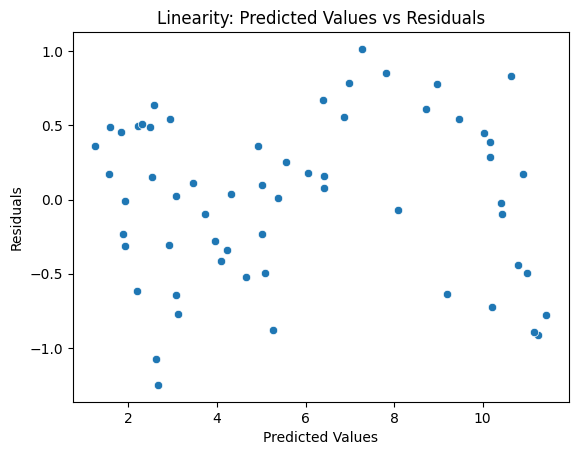

In [89]:
# Get the predicted values and residuals
predicted_values = results.fittedvalues
residuals = results.resid

# Plot the predicted values against the residuals
sns.scatterplot(x=predicted_values, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity: Predicted Values vs Residuals')
plt.show()

## OLS Assumption 2: The error term has a population mean of zero

* The second assumption of ordinary least squares (OLS) regression is that the error term, also known as the residual term, has an average or population mean of zero. This means that, on average, the residuals should balance out to zero, indicating that the model neither consistently overpredicts nor underpredicts the dependent variable.

    * In a regression model, the residuals are the differences between the observed values of the dependent variable and the predicted values obtained from the regression equation. Mathematically, the error term can be expressed as:

    * ε = Y - (β0 + β1*X1 + β2*X2 + ... + βk*Xk)

    * where ε represents the error term, Y is the observed value of the dependent variable, and β0, β1, β2, ..., βk are the estimated coefficients.

* The assumption of a zero population mean for the error term is important because it ensures that the model is unbiased. If the average of the error term is non-zero, it indicates a systematic bias in the model. For example, if the average of the residuals is positive, it suggests that the model consistently underpredicts the dependent variable, and if it is negative, the model consistently overpredicts. In both cases, the model is not capturing the true relationship between the independent and dependent variables.

* By including a constant term (β0) in the regression model, this assumption is automatically satisfied. The constant term allows the regression line to pass through the mean of the dependent variable, thereby forcing the average of the residuals to be zero.

* To assess whether this assumption holds, you can calculate the mean of the residuals and check if it is approximately zero.

* In summary, OLS Assumption 2 states that the error term in the regression model should have a population mean of zero, indicating that, on average, the model's predictions are unbiased and not consistently over or underestimating the dependent variable.


Assumption 2: The error term has a population mean of zero
Mean of the residuals: 9.773663360116795e-15


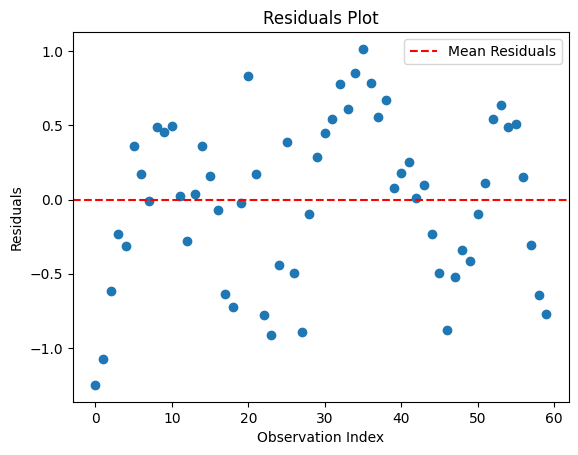

In [90]:
print("\nAssumption 2: The error term has a population mean of zero")
residual_mean = np.mean(results.resid)
print("Mean of the residuals:", residual_mean)

# Plot the residuals
plt.scatter(np.arange(len(results.resid)), results.resid)
plt.axhline(y=0, color='r', linestyle='--', label='Mean Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

## OLS Assumption 3: All independent variables are uncorrelated with the error term
* Assumption: Independent variables should not have any systematic relationship with the random and unpredictable part of the model (the error term).
* If there is a correlation between an independent variable and the error term, it violates this assumption.
* Violations can lead to biased coefficient estimates and inaccurate relationships between variables.
* Possible causes of violations: simultaneous relationships, omitted important variables, measurement errors.
* Techniques like instrumental variable estimation or control function approaches can be used to address violations.
* Ensuring independence between independent variables and the error term is crucial for accurate regression results.

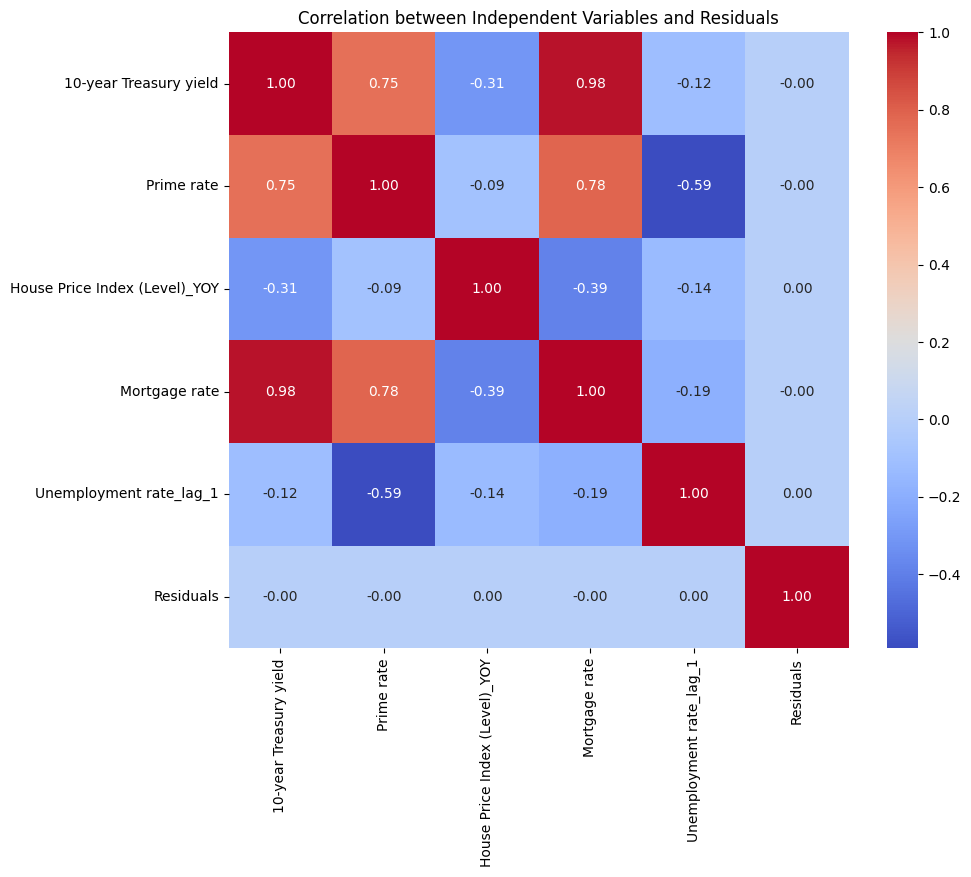

In [91]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X.iloc[:, 1:].T, results.resid)

# Create column labels for the heatmap
column_labels = np.append(X.columns[1:], "Residuals")

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            xticklabels=column_labels, yticklabels=column_labels, ax=ax)
ax.set_title('Correlation between Independent Variables and Residuals')
plt.show()


## OLS Assumption 4: Observations of the error term are uncorrelated with each other
OLS Assumption 4 states that the error terms should be uncorrelated with each other. This means that the error for one observation should not predict the error for the next observation. To check for serial correlation, plot the residuals in the order they were collected. Randomness in the plot indicates no serial correlation. If there is serial correlation, incorporate relevant variables, such as lagged values, into the model to capture the correlation and improve its accuracy.

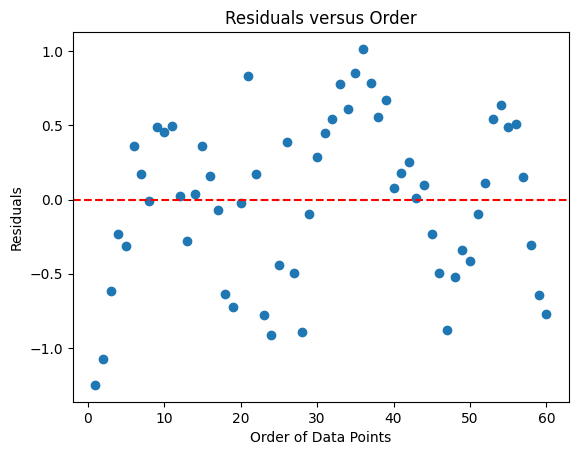

In [92]:
# Calculate the residuals
residuals = results.resid

# Create a sequence of numbers representing the order of the data points
order = range(1, len(residuals) + 1)

# Plot the residuals versus order
plt.scatter(order, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Order of Data Points')
plt.ylabel('Residuals')
plt.title('Residuals versus Order')
plt.show()


## OLS Assumption 5: The error term has a constant variance (no heteroscedasticity)
Heteroscedasticity refers to a violation of the assumption that the error term in a regression model has a constant variance across all observations. When heteroscedasticity is present, the spread or variability of the residuals differs across the range of fitted values. This can be problematic because it violates the assumption of equal variance, which is necessary for obtaining accurate and efficient estimates in ordinary least squares (OLS) regression.

The impact of heteroscedasticity on OLS regression is that it undermines the precision of the coefficient estimates and can lead to biased standard errors. Specifically, when heteroscedasticity is present, the standard errors of the coefficient estimates may be underestimated, resulting in overly narrow confidence intervals. Consequently, hypothesis tests for the significance of individual coefficients may be misleading.

Moreover, heteroscedasticity can affect the reliability and interpretability of the regression model. It can distort the significance of predictors, causing variables that are actually insignificant to appear significant, and vice versa. This can lead to incorrect conclusions about the relationships between the independent variables and the dependent variable.

To address heteroscedasticity, there are several techniques available, including robust standard errors, weighted least squares, and transforming the variables. These methods aim to adjust for the heteroscedasticity and provide more accurate coefficient estimates and standard errors.

In summary, heteroscedasticity violates the assumption of constant variance in the error term, which can compromise the precision, reliability, and interpretability of the OLS regression model. Detecting and addressing heteroscedasticity is crucial to ensure valid and accurate regression results.

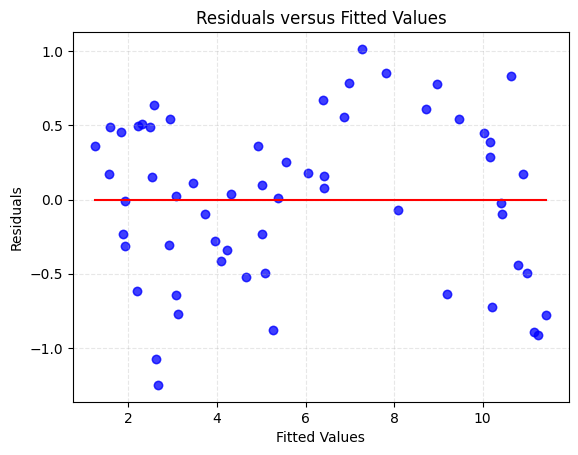

In [93]:
# Calculate the residuals and fitted values
residuals = results.resid
fitted_values = results.fittedvalues

# Create a scatter plot of residuals versus fitted values
plt.scatter(fitted_values, residuals, alpha=0.5, color='blue')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Fitted Values')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.3)

# Customize plot colors and markers
plt.scatter(fitted_values, residuals, alpha=0.5, color='blue', marker='o')

# Add a trendline (optional)
plt.plot(np.unique(fitted_values), np.poly1d(np.polyfit(fitted_values, residuals, 1))(np.unique(fitted_values)), color='red')

plt.show()


## OLS Assumption 6: No independent variable is a perfect linear function of other explanatory variables
OLS Assumption 6 states that no independent variable should be a perfect linear function of other explanatory variables. Perfect correlation occurs when two variables are completely dependent on each other, meaning that when one variable changes, the other changes by a fixed proportion. This perfect correlation indicates that the two variables are essentially measuring the same thing.

In OLS regression, perfect correlation between independent variables causes issues because the model cannot distinguish between the two variables. It becomes impossible to determine the unique contribution of each variable to the dependent variable. When variables are perfectly correlated, the statistical software will encounter difficulties in fitting the model and may display an error message.

Even though perfect correlation is a strict requirement, OLS regression can still handle cases where there is high correlation (but not perfect correlation) between independent variables. This condition is known as multicollinearity. High multicollinearity can cause problems because it reduces the precision of the coefficient estimates in the regression model. It becomes challenging to determine the individual effects of the correlated variables on the dependent variable.

To address multicollinearity, it is recommended to examine the correlation matrix among the independent variables and consider removing or transforming variables that exhibit strong correlation. By reducing multicollinearity, you can improve the stability and interpretability of the regression model.

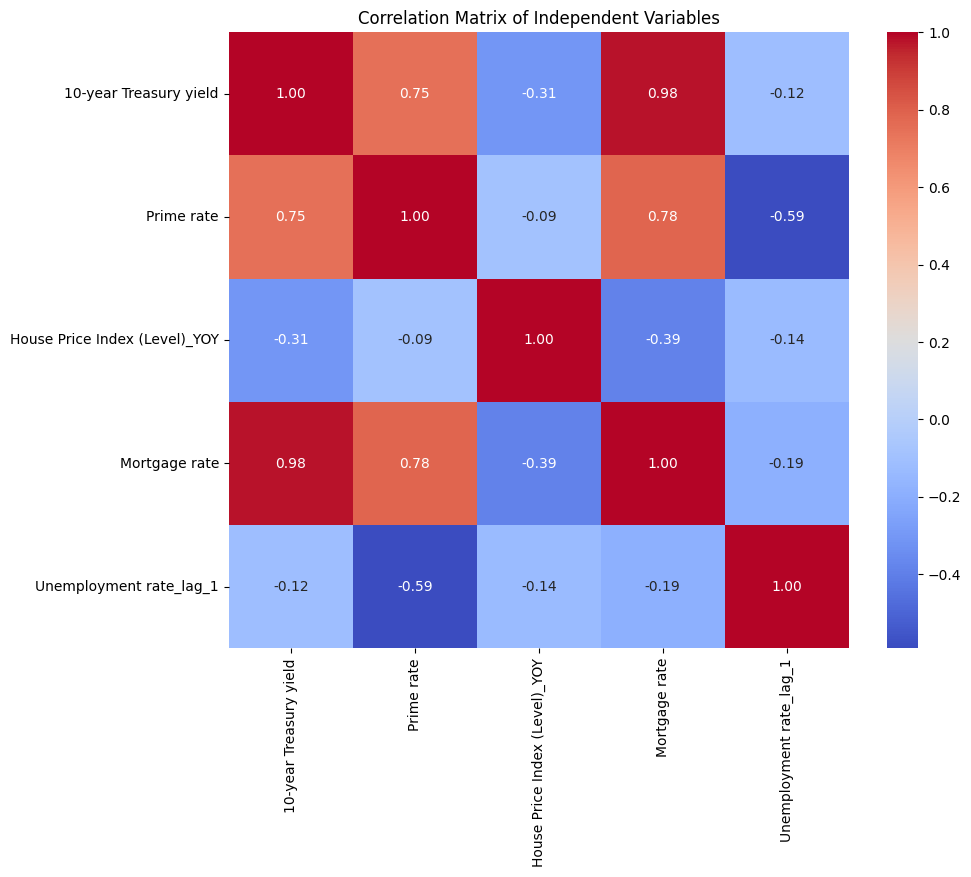

In [94]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X.iloc[:, 1:].corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, ax=ax)
ax.set_title('Correlation Matrix of Independent Variables')
plt.show()


## OLS Assumption 7: The error term is normally distributed (optional)
OLS Assumption 7 states that the error term, or the residuals, should follow a normal distribution. While violating this assumption does not affect the unbiasedness and minimum variance properties of the OLS estimates, it is important for conducting statistical hypothesis testing, generating reliable confidence intervals, and making predictions.

To assess the normality of the residuals, you can create a normal probability plot. This plot compares the observed residuals to what we would expect from a perfectly normal distribution. If the residuals fall approximately along a straight line on the plot, it indicates that they are normally distributed.

By checking the normality assumption, you can determine whether the p-values for the coefficient estimates and the overall test of significance are reliable. If the residuals deviate significantly from a normal distribution, it may affect the validity of statistical tests and confidence intervals.

In summary, while normality of residuals is not required for unbiasedness and minimum variance, it is important to check this assumption if you need to rely on p-values, hypothesis testing, and confidence intervals.

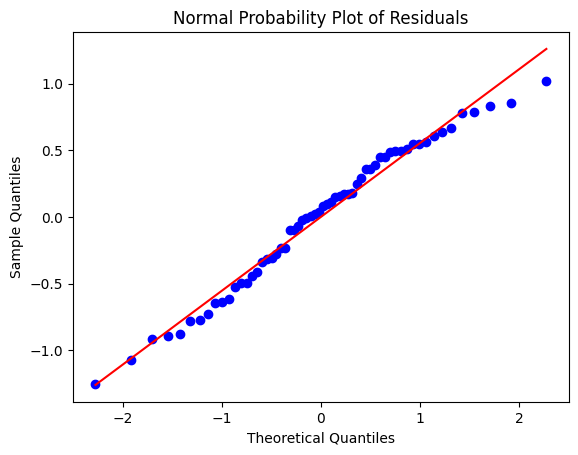

In [95]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = results.resid

# Generate a normal probability plot
stats.probplot(residuals, plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


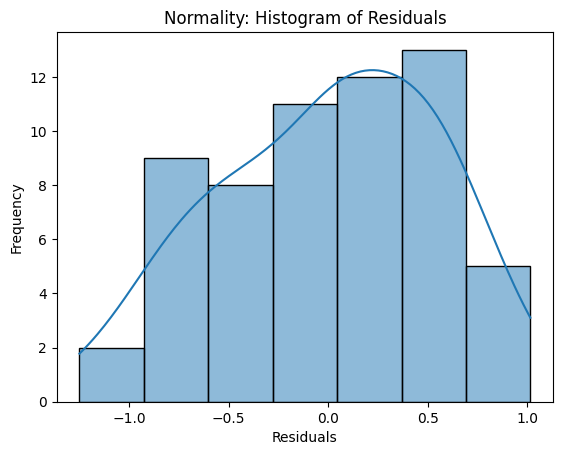

In [96]:
# You can visually check the normality assumption by plotting the histogram of the residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Normality: Histogram of Residuals')
plt.show()


# Evaluation on Testing Data/Unseen data

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import datetime

import matplotlib.pyplot as plt

def Evaluation(df, predictors, response, fitted_model_list):
    """
    It will plot the actual and predict curves and calculates the given evaluation matrics
    Args:
        df (_type_): it will take training dataframe or testing dataframe
        predictors (_type_): it will take the list of perdictors variables names
        response (_type_): _if will take the response variable name
        fitted_model_list (_type_): it will take list of fitted model
    """

    for model_fitted_instance in fitted_model_list:
        model = model_fitted_instance[0]
        model_name = model_fitted_instance[1]
        print(model_name)

        results_df = pd.DataFrame()
        results_df['Predicted'] = model.predict(sm.add_constant(df[predictors])).tolist()
        results_df['Actual'] = df[response].tolist()

        # Calculate MSE
        mse = mean_squared_error(results_df['Predicted'], results_df['Actual'])
        mae = mean_absolute_error(results_df['Predicted'], results_df['Actual'])

        # Calculate RMSE
        rmse = np.sqrt(mse)
        print("MSE:", mse)
        print("RMSE:", rmse)
        print('MAE', mae)


        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(df['Date'], results_df['Actual'], label='Actual', marker='o')
        plt.plot(df['Date'], results_df['Predicted'], label='Predicted', marker='o')
        plt.xlabel('Observation')
        plt.ylabel('DRS Target Variable')
        # plt.yticks(np.arange(testing_data[response].min(), testing_data[response].max(), 0.1))
        plt.title(f'Out Sampling Results Curves | Model-{model_name}')
        plt.legend()

        # Add error metrics in the legend
        legend_text = f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}"
        plt.legend(title=legend_text)
        plt.xticks(rotation=90)

        plt.tight_layout()
        plt.show()

def generate_quarterly_dates(start_year, end_year):
    """
    Generate a list of quarterly dates in the format 'Q<quarter>-<year>'.

    Args:
        start_year (int): The starting year.
        end_year (int): The ending year.

    Returns:
        list: A list of quarterly dates.

    Example:
        >>> generate_quarterly_dates(2020, 2021)
        ['Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020', 'Q1-2021', 'Q2-2021', 'Q3-2021', 'Q4-2021']
    """
    start_date = datetime.date(start_year, 1, 1)
    end_date = datetime.date(end_year, 12, 31)
    quarter_dates = []

    current_date = start_date
    while current_date <= end_date:
        quarter = (current_date.month - 1) // 3 + 1
        quarter_year = "Q{}-{}".format(quarter, current_date.strftime("%Y"))
        quarter_dates.append(quarter_year)
        current_date += datetime.timedelta(days=92)

    return quarter_dates


OLS
MSE: 4.335528910212789
RMSE: 2.08219329319177
MAE 1.8699817055141046


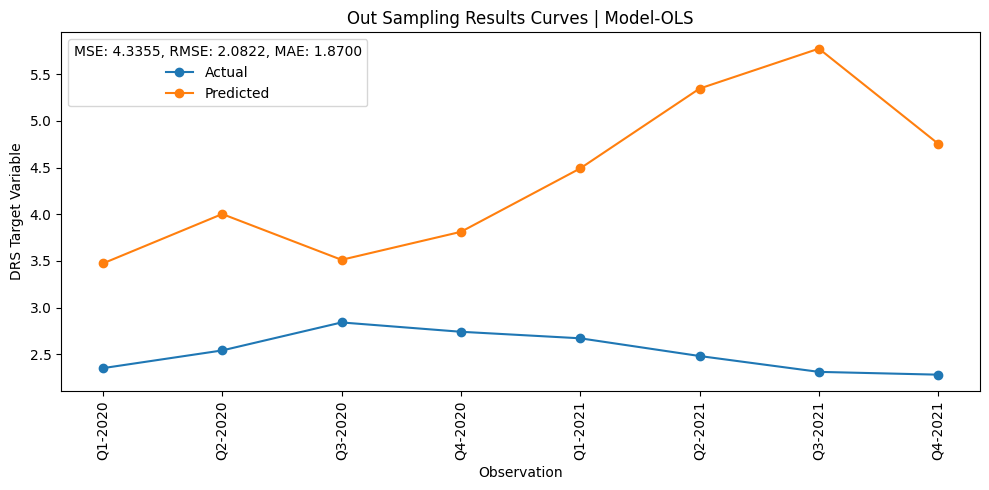

In [75]:

predictors = ['10-year Treasury yield','Prime rate', 'Unemployment rate_lag_1', 'House Price Index (Level)_YOY','Mortgage rate']
response = 'DRS-Target Variable'
testing_data['Date'] = generate_quarterly_dates(2020,2021)
df = testing_data
fitted_model_list = [(results ,'OLS' )]
Evaluation(df,predictors,response,fitted_model_list)